# 决策树
### 信息增益

"信息熵"(information entropy)是度量样本集合纯度最常用的一种指标. 假定当前样本集合D中第k类样本所占的比例为$p_k(k=1,2,\dots,|Y|)$, 则$D$的信息熵定义为
$$
\operatorname{Ent}(D)=-\sum_{k=1}^{ | \mathcal{Y |}} p_{k} \log _{2} p_{k}
$$
$\operatorname{Ent}(D)$ 的值越小, 则$D$的纯度越高。

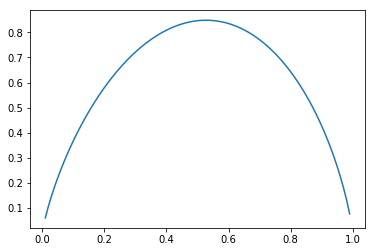

In [13]:
# 例如对于只存在两个类别的集合来说
import numpy as np
import matplotlib.pyplot as plt
p = np.linspace(0.01,0.99,100)
ent = []
for pi in p:
    ent.append(-pi*np.log(pi)-(1-pi)*np.log2(1-pi))
plt.plot(p,ent)
plt.show()

如上图所示, 
- 当存在一种类别的时候, Ent(D)数值最低, 纯净度最高。
- 当两个类别各占一半的时候, Ent(D)数值最大, 其混乱度越大。

a 为离散属性, 有V个可能的取值${a^1,a^2,...,a^V}$, 若使用a来对样本集合D进行划分, 则会产生V个分支节点,其中第v个分支节点包含了D中所有在属性a上取值为$a^v$的样本, 记为$D^v$.

同时考虑到不同的分支节点所包含的样本数不同, 给分支节点赋予权重 $|D^v|/|D|$, 即样本数越多的分支节点的影响越大,于是可计算出属性a对样本集D进行划分所获得的"信息增益"(information gain)
$$
\operatorname{Gain}(D, a)=\operatorname{Ent}(D)-\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \operatorname{Ent}\left(D^{v}\right)
$$
一般而言，信息增益越大，则意味着使周属性 α 来进行划分所获得的"纯度提升"越大.

#### 下面以西瓜数据集为例,  该数据集包含17个训练样本, 我们将根据此数据集建立决策树, 从而预测未知的西瓜是好瓜还是坏瓜
- $|Y|=2$ (包含 好瓜还是 坏瓜)
- 正例占 p1=8/17, 反例占 p2=9/17
基于此, 我们可以计算根节点的信息熵为:
$$
\operatorname{Ent}(D)=-\sum_{k=1}^{2} p_{k} \log _{2} p_{k}=-\left(\frac{8}{17} \log _{2} \frac{8}{17}+\frac{9}{17} \log _{2} \frac{9}{17}\right)=0.998
$$

| 编号 | 色泽 | 根蒂 |  敲声  | 纹理 | 脐部 | 触感 | 好瓜 |
|:----:|:----:|:----:|:------:|:----:|:----:|:----:|:----:|
|   1  | 青绿 | 蜷缩 |  浊响  | 清晰 | 凹陷 | 硬滑 |  是  |
|   2  | 乌黑 | 蜡缩 |  沉闷  | 清晰 | 凹陷 | 硬滑 |  是  |
|   3  | 乌黑 | 蜡缩 |  1虫响 | 清晰 | 凹陷 | 硬滑 |  是  |
|   4  | 青绿 | 蜷缩 |  沉闷  | 清晰 | 凹陷 | 硬滑 |  是  |
|   5  | 浅白 | 蜷缩 |  浊响  | 清晰 | 凹陷 | 硬滑 |  是  |
|   6  | 青绿 | 稍蜷 |  浊响  | 清晰 | 稍凹 | 软粘 |  是  |
|   7  | 乌黑 | 稍蜷 | 浊日向 | 稍糊 | 稍凹 | 软粘 |  是  |
|   8  | 乌黑 | 稍蜷 | 独日向 | 清晰 | 稍凹 | 硬滑 |  是  |
|   9  | 乌黑 | 稍蜷 |  祝闷  | 硝糊 | 稍凹 | 硬滑 |  否  |
|  10  | 青绿 | 硬挺 |  清脆  | 清晰 | 平坦 | 软粘 |  否  |
|  11  | 洁白 | 硬挺 |  清脆  | 模糊 | 平坦 | 硬滑 |  否  |
|  12  | 洁白 | 蜷缩 |  浊响  | 模糊 | 平坦 | 软粘 |  否  |
|  13  | 青绿 | 稍蜷 |  浊响  | 稍糊 | 凹陷 | 硬滑 |  否  |
|  14  | 浅白 | 稍蜷 |  沉闷  | 稍糊 | 凹陷 | 硬情 |  否  |
|  15  | 乌黑 | 稍蜷 |  浊响  | 清晰 | 稍凹 | 软粘 |  否  |
|  16  | 践自 | 蜷缩 |  浊响  | 模糊 | 平坦 | 硬滑 |  否  |
|  17  | 青绿 | 蜡缩 |  沉闷  | 稍糊 | 稍凹 | 硬滑 |  否  |

In [15]:
import numpy as np
Ent = - (8/17*np.log2(8/17)+9/17*np.log2(9/17))
print(Ent)

0.9975025463691153


计算属性合集, 同时需要计算每个属性的信息增益
- 以色泽为例, 他有三个可能的取值: {青绿，乌黑，浅白}. 如果使用该属性对D进行划分, 则得到3个子集, 分别记为: 
    - $D^1$(色泽=青绿)
    - $D^2$(色泽=乌黑)
    - $D^3$(色泽=浅白)
用"色泽"划分之后所获得的三个分支节点的信息熵为
$$
\begin{aligned} \operatorname{Ent}\left(D^{1}\right) &=-\left(\frac{3}{6} \log _{2} \frac{3}{6}+\frac{3}{6} \log _{2} \frac{3}{6}\right)=1.000 \\ \operatorname{Ent}\left(D^{2}\right) &=-\left(\frac{4}{6} \log _{2} \frac{4}{6}+\frac{2}{6} \log _{2} \frac{2}{6}\right)=0.918 \\ \operatorname{Ent}\left(D^{3}\right) &=-\left(\frac{1}{5} \log _{2} \frac{1}{5}+\frac{4}{5} \log _{2} \frac{4}{5}\right)=0.722 \end{aligned}
$$
于是, 我们可以计算出如果按照"色泽"进行划分的信息增益为:
$$
\begin{array}{l}
Gain(D,色泽)&=\operatorname{Ent}(D)-\sum_{v=1}^{3} \frac{\left|D^{v}\right|}{|D|} \operatorname{Ent}\left(D^{v}\right) \\ 
&=0.998-\left(\frac{6}{17} \times 1.000+\frac{6}{17} \times 0.918+\frac{5}{17} \times 0.722\right) \\ 
&=0.109
\end{array}
$$
类似的, 我们可计算出其他属性的信息增益
- $Gain(D,根蒂)=0.143$
- $Gain(D,敲声)=0.141$
- $Gain(D,纹理)=0.381$
- $Gain(D,脐部)=0.289$
- $Gain(D,触感)=0.006$

最终形成的决策树如下图所示
![decission tree](./figs/dtree_final.jpg)


### 增益率
实际上，信息增益准则对可取值数目较多的属性有所偏好，为减少这种
偏好可能带来的不利影响，著名的 C4.5 决策树算法不直接使
用信息增益，而是使用"增益率" (gain  ratio) 来选择最优划分属性.采用与相同的符号表示，增益率定义为
$$
(D, a)=\frac{\operatorname{Gain}(D, a)}{\operatorname{IV}(a)}
$$
其中
$$
\mathrm{IV}(a)=-\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \log _{2} \frac{\left|D^{v}\right|}{|D|}
$$
称为属性 α 的"固有值" (intrinsic  value) 属性 α 的可能
取值数目越多(即 V 越大)，则 IV(α) 的值通常会越大.例如，西
瓜数据集 2.0 ，有 
- IV(触感) =  0.874  (V  =  2),  
- IV(色泽) =  1.580  (V  =  3), 
- IV( 编号) = 4.088  (V = 17). 

### 基尼系数
数据集的纯度可以使用基尼值来度量:
$$
\begin{aligned} \operatorname{Gini}(D) &=\sum_{k=1}^{|\mathcal{Y}|} \sum_{k^{\prime} \neq k} p_{k} p_{k^{\prime}} \\ &=1-\sum_{k=1}^{|\mathcal{Y}|} p_{k}^{2} \end{aligned}
$$
只管来说, Gini(D)反映了从数据集D中随机抽取两个样本, 其类别标记不一致的概率. 因此, Gini(D)值越小, 则数据集D的纯度越高.

如下图所示, 集合中存在两个类别, 当一个类别所占的比例比较高时,gini系数越小.

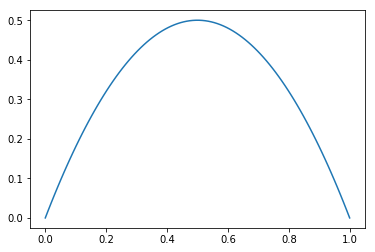

In [2]:
import numpy as np
import matplotlib.pyplot as plt
p1 = np.linspace(0,1,100)
gini = []
for pi in p1:
    gini.append(1-pi**2 - (1-pi)**2)
plt.plot(p1, gini)
plt.show()

属性a的基尼指数定义为
$$
\text{Gini index}(D, a)=\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \operatorname{Gini}\left(D^{v}\right)
$$
选择划分后基尼指数最小的属性.

### 基尼系数和信息熵对比

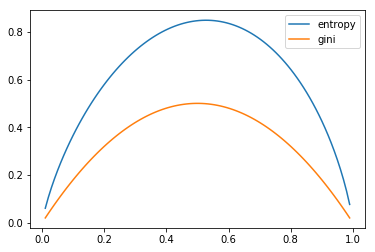

In [7]:
# comparison gini and entropy
import numpy as np
import matplotlib.pyplot as plt
p = np.linspace(0.01,0.99,100)
ent = []
gini = []
for pi in p:
    ent.append(-pi*np.log(pi)-(1-pi)*np.log2(1-pi))
    gini.append(1-pi**2 - (1-pi)**2)
plt.plot(p,ent,label="entropy")
plt.plot(p, gini,label="gini")
plt.legend()
plt.show()

## 剪枝处理
剪枝时决策树学习算法对付"过拟合"的主要手段。

决策树剪枝的基本策略有"预剪枝(prepruning)" 和 "后剪枝"(postpruning). 

预剪枝是指在决策树生成过程中,对每个节点在划分前先进行估计,若当前节点的划分不能带来决策树泛化性能提升,则停止划分并将当前节点标记为叶结点;

后剪枝则是先从训练集生成一颗完整的决策树,然后自底向上地对非节点进行考察,若将该节点对应的子树替换为叶结点能带来决策树泛化性能提升,则将该子树替换为叶节点。

如何判断决策树泛化性能是否提升呢?
- 用验证集的误差和训练集的误差做对比

![decision tree](./figs/dtree.jpg)

### 后剪枝
![post](./figs/tree_post.jpg)

## 连续与缺失值
### 连续值处理
二分法, 考察n-1个元素的候选划分点集合
$$
T_{a}=\left\{\frac{a^{i}+a^{i+1}}{2} | 1 \leqslant i \leqslant n-1\right\}
$$
即把区间$\left[a^{i}, a^{i+1}\right)$ 的中位点作为候选划分点. 然后就可以像离散属性值一样来考察这些划分点.
$$
\begin{aligned} \operatorname{Gain}(D, a) &=\max _{t \in T_{a}} \operatorname{Gain}(D, a, t) \\ &=\max _{t \in T_{a}} \operatorname{Ent}(D)-\sum_{\lambda \in\{-,+\}} \frac{\left|D_{t}^{\lambda}\right|}{|D|} \operatorname{Ent}\left(D_{t}^{\lambda}\right) \end{aligned}
$$
其中$\operatorname{Gain}(D, a, t)$是样本集合D基于划分点t二分后的信息增益. 

### 缺失值处理

## 多变量决策树
![多变量决策树](./figs/univariable.jpg)

将决策边界替换为线性分类器